# UFC Fighter Statistics Analysis

## 1. Data Set Description and Attributes

MMA (Mixed Martial Arts): MMA is a full-contact combat sport that combines elements of various martial arts and combat sports, such as boxing, wrestling, judo, and Brazilian jiu-jitsu. It involves fighting in a controlled environment, typically a cage or ring, with the aim of knocking out or submitting your opponent.

UFC (Ultimate Fighting Championship): The UFC is the largest and most well-known MMA promotion organization, hosting events and tournaments to determine the world champions in different weight classes. Founded in 1993, the UFC has grown into a global phenomenon, showcasing the skills of top MMA fighters.

The UFC Fighter Statistics dataset from Kaggle mdabbert (Owner) contains information about UFC fights and fighters:

•	4896 rows (fighters)

•	119 columns (attribues)

The attributes include:

•	Fighter attributes (age, height, weight, reach, stance)

•	Fight attributes (date, location, weight class, title bout)

•	Odds and probabilities

•	Fight outcomes (winner, finish, finish details, total fight time)

Importing the neccesary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

 
dataset = pd.read_csv("ufc-master.csv")


## 2. Initial Exploration

Checking the number of rows and columns

In [61]:
dataset.shape

(4896, 119)

Checking the attributes we have as the columns

In [62]:
dataset.columns.tolist()

['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'date',
 'location',
 'country',
 'Winner',
 'title_bout',
 'weight_class',
 'gender',
 'no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_avg_SIG_STR_landed',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_landed',
 'B_avg_TD_pct',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_title_bouts',
 'B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage',
 'B_wins',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_current_lose_streak',
 'R_current_win_streak',
 'R_draw',
 'R_avg_SIG_STR_landed',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_landed',
 'R_avg_TD_pct',
 'R_longest_win_streak',
 'R_losses',
 'R_total_rounds_fought',
 'R_total_title_bouts',
 'R_win_by_Decision_Majority',
 'R_win_by_Decision_Split',
 'R_win_by_Decision_Un

We see above a data point is made of a lot of features that constitute a fight in Mixed martial arts. 
-The stats of each fighter from weightclass, rankings, reach etc.
-to other stats such odds before the fight of total rounds fought before or title match or not etc
-and  then ultimately the results of the fight.

Visualizing the distribution of weight classes by plotting

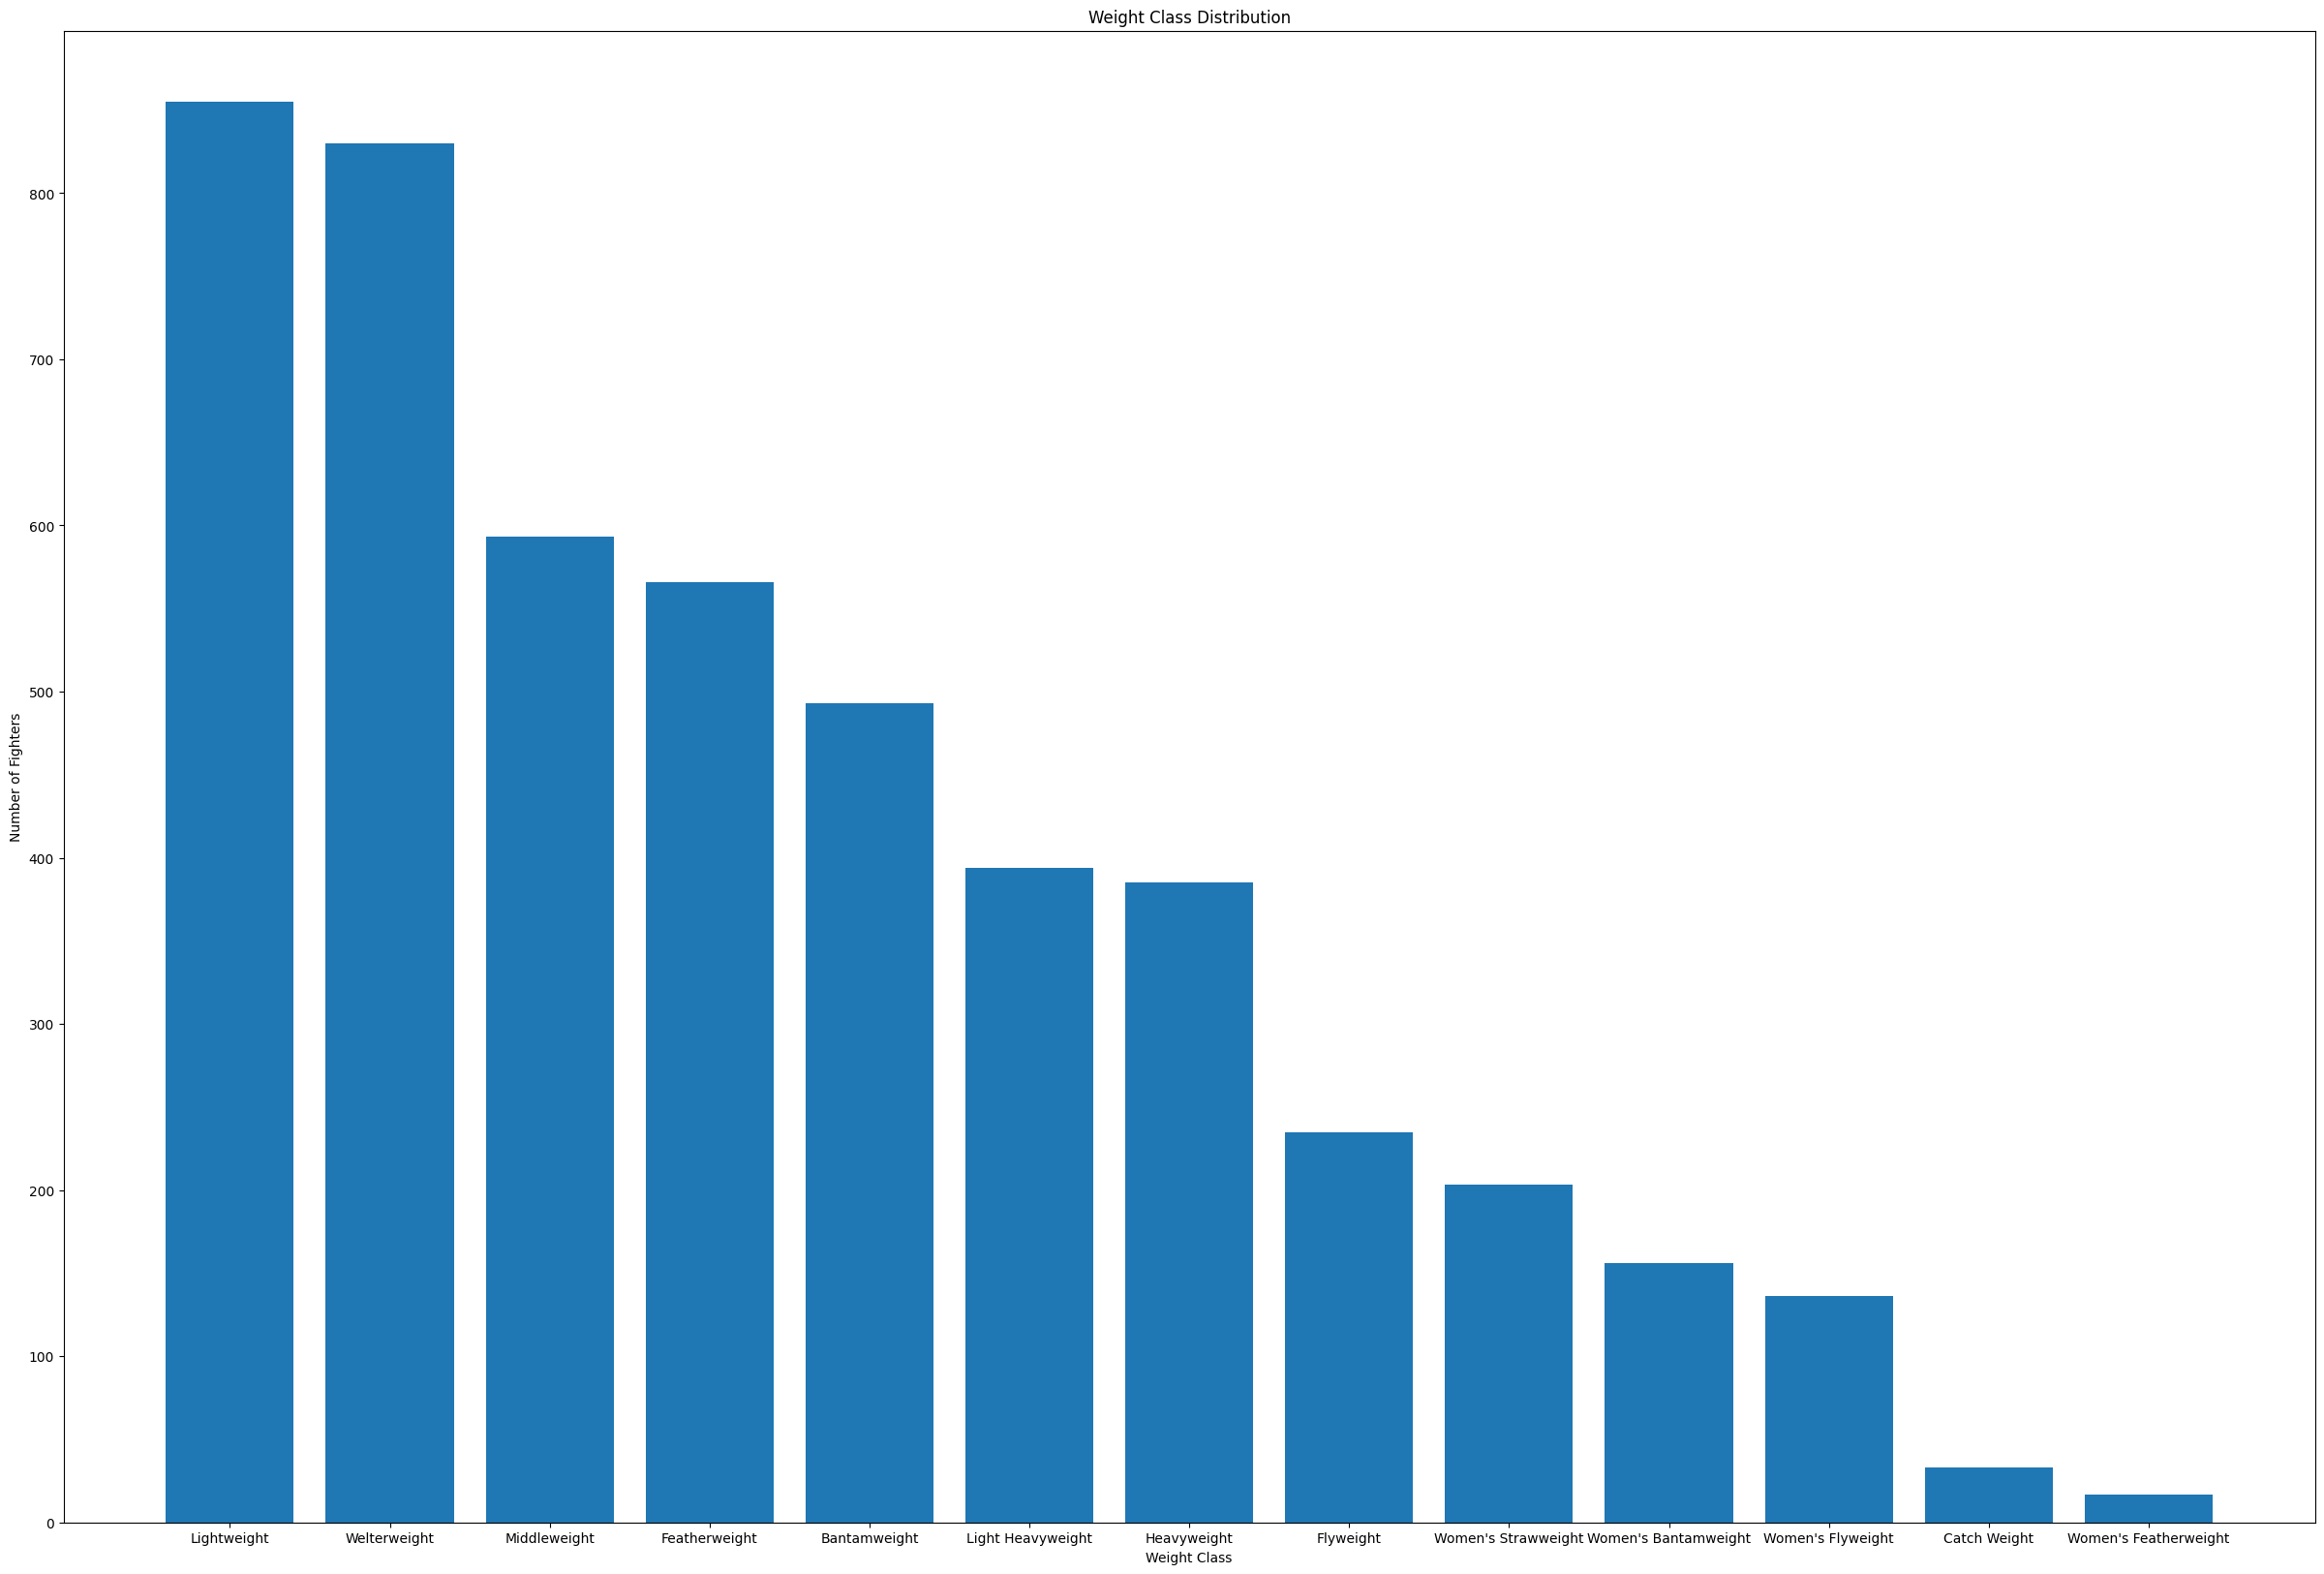

In [63]:
 
weight_classes = dataset['weight_class'].value_counts()

plt.figure(figsize=(30,20)) 
plt.bar(weight_classes.index, weight_classes.values)
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')
plt.title('Weight Class Distribution')
plt.show()

Extractng the Ages of fighters

In [64]:
 
ages_df = pd.DataFrame({
    'Age': pd.concat([dataset['R_age'], dataset['B_age']]),
    'Result': pd.concat([dataset['Winner'] == 'Red', dataset['Winner'] == 'Blue'])
})
 
ages_df['Result'] = ages_df['Result'].map({True: 'Won', False: 'Lost'})

Using the ages to visualize fighter age distribution

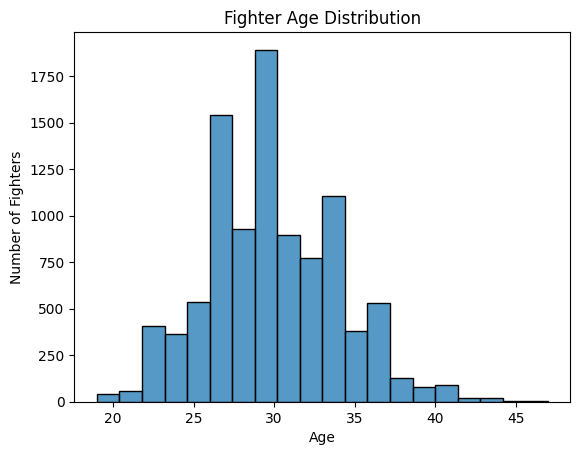

In [65]:
 
sns.histplot(ages_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Fighters')
plt.title('Fighter Age Distribution')
plt.show()

Visualizing the distribution of fight duration which is the total fight time in seconds before the fight ended.

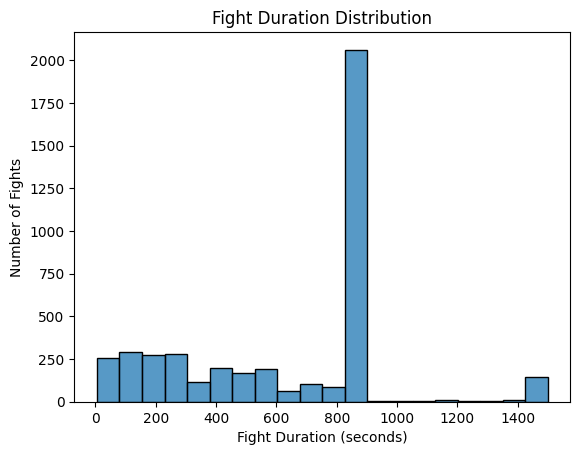

In [66]:
sns.histplot(dataset['total_fight_time_secs'], bins=20)
plt.xlabel('Fight Duration (seconds)')
plt.ylabel('Number of Fights')
plt.title('Fight Duration Distribution')
plt.show()

Visualizing the distribution of 'finish' attribute which is how the fight ended

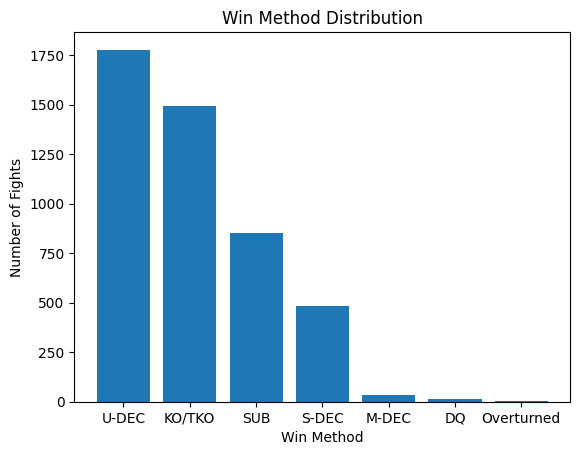

In [67]:
win_methods = dataset['finish'].value_counts()

plt.bar(win_methods.index, win_methods.values)
plt.xlabel('Win Method')
plt.ylabel('Number of Fights')
plt.title('Win Method Distribution')
plt.show()

Check the list of all finish types

In [68]:
dataset['finish'].unique().tolist()

['U-DEC', 'S-DEC', 'KO/TKO', 'SUB', 'M-DEC', 'DQ', nan, 'Overturned']

Finally visualizing a scatterplot of fight duration (total_fight_time_secs) vs the win method (finish)

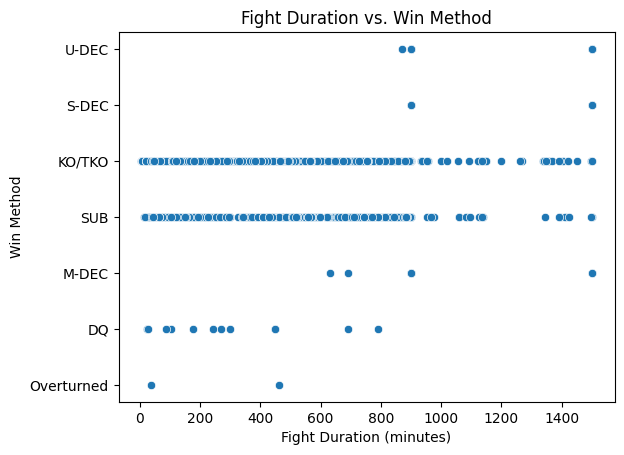

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

 
sns.scatterplot(x='total_fight_time_secs', y='finish', data=dataset)

plt.xlabel('Fight Duration (minutes)')
plt.ylabel('Win Method')
plt.title('Fight Duration vs. Win Method')
plt.show()

## 3. Key Findings and Insights

Weight Class Distribution 
- Lightweight and Welterweight divisions have the most fight
- Female divisions constitute the least fights.

Fighter Age Distribution
- Fighter ages range from 20 to 45 years with most fights centered around fighters at the age of 30.

Fight Duration Distribution
- Most fights go exactly  last 3 rounds.

Win Method Distribution
- Uninamous Decision (U-Dec) and KO/TKO are the most common win methods with Majority Decision and DQ amongst the least methods of a fight is decided. 
- Also a few fights had decisions overtuned so the actual finish result is not available.

Win Method vs. Fight D
- Disqualifications (DQ) occur in earlier rounds.
nds.


Selecting a subset of attributes from the initial 119 available to focus on for simplicity.
o	Fighter attributes (odds, reach, age)
o	Fight attributes (weight class, total fight time, finish)
o	Outcome (winner)


## 4.  Data Cleaning and Feature Engineering


In [70]:
useful_data = dataset[['R_odds','B_odds','weight_class','R_Reach_cms','B_Reach_cms','R_age','B_age','Winner','total_fight_time_secs', 'finish', 'gender']]

Analyzing the selected attributes and datatypes

In [71]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   R_odds                 4895 non-null   float64
 1   B_odds                 4896 non-null   int64  
 2   weight_class           4896 non-null   object 
 3   R_Reach_cms            4896 non-null   float64
 4   B_Reach_cms            4896 non-null   float64
 5   R_age                  4896 non-null   int64  
 6   B_age                  4896 non-null   int64  
 7   Winner                 4896 non-null   object 
 8   total_fight_time_secs  4274 non-null   float64
 9   finish                 4658 non-null   object 
 10  gender                 4896 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 420.9+ KB


R_odds and B_odds represent the same information (odds for the opposing fighters) but have different datatypes
Therefore converting B_odds to float datatype to match.

In [72]:
useful_data['B_odds'] = useful_data['B_odds'].astype(float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8048\88973202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_data['B_odds'] = useful_data['B_odds'].astype(float)


Checking for missing values in the data

In [73]:
useful_data.isnull().sum().sort_values()

B_odds                     0
weight_class               0
R_Reach_cms                0
B_Reach_cms                0
R_age                      0
B_age                      0
Winner                     0
gender                     0
R_odds                     1
finish                   238
total_fight_time_secs    622
dtype: int64

Missing values: 1 for R_odds, 238 for finish and 622 for total_fight_time_secs.

Checking to see if any 'finish' may be unrepresented and actually the null values shown from above

In [74]:
useful_data['finish'].value_counts()

finish
U-DEC         1778
KO/TKO        1495
SUB            854
S-DEC          483
M-DEC           32
DQ              14
Overturned       2
Name: count, dtype: int64

Next steps:

    Drop all missing values

    Also drop overtuned results as they have no meaning

    Also drop catchweight because we can never be sure what weightclass it actually was
    Catchweight - Usually means fighters could not make a desired weight for the fighter, data suggests its rare so its unrepresantative of anything.

In [75]:
useful_data = useful_data.dropna()
useful_data = useful_data[useful_data['finish'] != 'Overturned'] 
useful_data = useful_data[useful_data['weight_class'] != 'Catch Weight']

Check if all mssing values are gone

In [76]:
useful_data.isnull().sum().sort_values()

R_odds                   0
B_odds                   0
weight_class             0
R_Reach_cms              0
B_Reach_cms              0
R_age                    0
B_age                    0
Winner                   0
total_fight_time_secs    0
finish                   0
gender                   0
dtype: int64

Check the finish column values

In [77]:
useful_data['finish'].unique().tolist()


['U-DEC', 'S-DEC', 'KO/TKO', 'SUB', 'M-DEC', 'DQ']

Use the finish column to engineer a new feature that represents
whether a fight was stopped ( KO/TKO, Submission, Disqualification) or
it went the distance and judges decided the fight

In [78]:
 
conditions = [
    useful_data['finish'].str.contains('DEC'),
    useful_data['finish'].str.contains('KO/TKO'),
    useful_data['finish'].str.contains('SUB'),
    useful_data['finish'].str.contains('DQ')
]
values = ['Decision', 'Stoppage', 'Stoppage', 'Stoppage']

 
useful_data['fight_outcome'] = np.select(conditions, values, default='Unknown')

Check the new attribute

In [79]:
useful_data['fight_outcome']

0       Decision
1       Decision
2       Decision
3       Stoppage
4       Decision
          ...   
4891    Stoppage
4892    Stoppage
4893    Stoppage
4894    Decision
4895    Decision
Name: fight_outcome, Length: 4251, dtype: object

Calculate rercentage difference in reach ( reach_diff_pct ) and odds ( odds_diff_pct ) between fighters.
The original dataset had reach diff but here we calculate the percentage to account for varieties in weight class

In [80]:
useful_data['reach_diff_pct'] = (useful_data['R_Reach_cms'] - useful_data['B_Reach_cms']) / ((useful_data['R_Reach_cms'] + useful_data['B_Reach_cms']) / 2) * 100
useful_data['odds_diff_pct'] = np.where(useful_data['R_odds'] == useful_data['B_odds'], 0, (useful_data['R_odds'] - useful_data['B_odds']) / ((useful_data['R_odds'] + useful_data['B_odds']) / 2 + 1e-6) * 100)

View statistics for the numerical data

In [81]:
useful_data.describe()

,R_odds,B_odds,R_Reach_cms,B_Reach_cms,R_age,B_age,total_fight_time_secs,reach_diff_pct,odds_diff_pct
count,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4251.000000,4.251000e+03
mean,-119.519172,69.041637,182.714822,182.595796,30.041167,29.462009,652.343213,0.080738,-5.174412e+06
std,269.718803,249.547302,10.782055,10.900873,4.103135,3.982332,357.844443,5.500985,3.374249e+08
min,-1700.000000,-1200.000000,152.400000,0.000000,19.000000,19.000000,5.000000,-15.384615,-2.200000e+10
25%,-255.000000,-145.000000,175.260000,175.260000,27.000000,27.000000,297.000000,-2.857143,-2.200000e+03
50%,-150.000000,130.000000,182.880000,182.880000,30.000000,29.000000,900.000000,0.000000,2.000000e+03
75%,125.000000,222.500000,190.500000,190.500000,33.000000,32.000000,900.000000,2.816901,3.000000e+03
max,775.000000,1300.000000,214.630000,213.360000,47.000000,47.000000,1500.000000,200.000000,6.800001e+03


Scaling odds and reach columns

In [82]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['R_odds', 'B_odds', 'R_Reach_cms', 'B_Reach_cms']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns
useful_data[columns_to_scale]  = scaler.fit_transform(useful_data[columns_to_scale])

Checking stats after scaling

In [83]:
useful_data.describe()

,R_odds,B_odds,R_Reach_cms,B_Reach_cms,R_age,B_age,total_fight_time_secs,reach_diff_pct,odds_diff_pct
count,4.251000e+03,4.251000e+03,4.251000e+03,4.251000e+03,4251.000000,4251.000000,4251.000000,4251.000000,4.251000e+03
mean,1.002883e-17,-4.680122e-17,4.646692e-16,1.678158e-15,30.041167,29.462009,652.343213,0.080738,-5.174412e+06
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,4.103135,3.982332,357.844443,5.500985,3.374249e+08
min,-5.860425e+00,-5.085973e+00,-2.811930e+00,-1.675254e+01,19.000000,19.000000,5.000000,-15.384615,-2.200000e+10
25%,-5.023631e-01,-8.578206e-01,-6.914915e-01,-6.730341e-01,27.000000,27.000000,297.000000,-2.857143,-2.200000e+03
50%,-1.130229e-01,2.443045e-01,1.532148e-02,2.607471e-02,30.000000,29.000000,900.000000,0.000000,2.000000e+03
75%,9.066774e-01,6.150193e-01,7.221345e-01,7.251835e-01,33.000000,32.000000,900.000000,2.816901,3.000000e+03
max,3.316878e+00,4.933346e+00,2.960376e+00,2.822510e+00,47.000000,47.000000,1500.000000,200.000000,6.800001e+03


View current attributes

In [84]:
useful_data.columns

Index(['R_odds', 'B_odds', 'weight_class', 'R_Reach_cms', 'B_Reach_cms',
       'R_age', 'B_age', 'Winner', 'total_fight_time_secs', 'finish', 'gender',
       'fight_outcome', 'reach_diff_pct', 'odds_diff_pct'],
      dtype='object')

One hot encode 'weight_class', Winner', 'finish', 'gender', 'fight_outcome' and store the new dataframe in a new variable

In [85]:
useful_data1 = pd.get_dummies(data=useful_data)

View the new list columns

In [86]:
useful_data1.columns

Index(['R_odds', 'B_odds', 'R_Reach_cms', 'B_Reach_cms', 'R_age', 'B_age',
       'total_fight_time_secs', 'reach_diff_pct', 'odds_diff_pct',
       'weight_class_Bantamweight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women's Bantamweight',
       'weight_class_Women's Featherweight', 'weight_class_Women's Flyweight',
       'weight_class_Women's Strawweight', 'Winner_Blue', 'Winner_Red',
       'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_S-DEC',
       'finish_SUB', 'finish_U-DEC', 'gender_FEMALE', 'gender_MALE',
       'fight_outcome_Decision', 'fight_outcome_Stoppage'],
      dtype='object')

## 6. Formulating Hypotheses about the Data

Based on the initial exploration and data cleaning steps, here are three formulated hypotheses to be tested using the UFC fighter statistics data:

    1.	Hypothesis 1: There is a statistically significant difference in total fight time between male and female fighters.
    2.	Hypothesis 2: There is a statistically significant association between weight class and fight outcome.
    3.	Hypothesis 3: There is a statistically significant difference in average fight duration across weight classes.


### Conducting a Formal Significance Test

Hypothesis Testing: 

Hypothesis 1: 

    Null Hypothesis (H0): There is no statistically significant difference in total fight time between male and female fighteras:
    H0: μ_male = μ_female
    where μ_male and μ_female are the mean total fight times for male and female fighters, respectively.
    Alternative Hypothesis (H1):
    There is a statistically significant difference in total fight time between male and female finted as:
    H1: μ_male ≠ μ_female
    This alternative hypothesis suggests that the mean total fight times for male and female fighters are different.

Visualize

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8048\189761201.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_tfts,color='green',hist=False)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8048\189761201.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fema

<Axes: xlabel='total_fight_time_secs', ylabel='Density'>

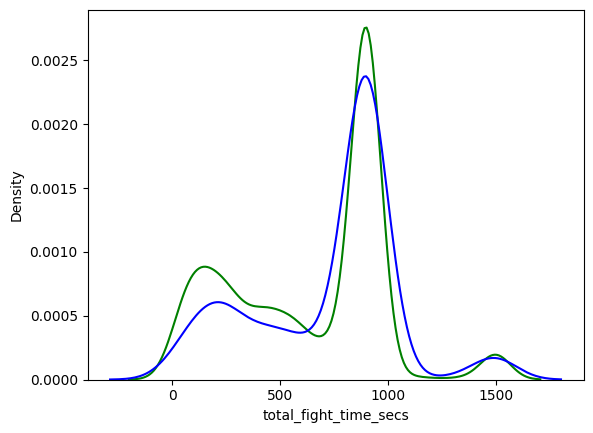

In [92]:
males = useful_data.loc[useful_data['gender'] == 'MALE']
females = useful_data.loc[useful_data['gender'] == 'FEMALE']
 
male_tfts = males.total_fight_time_secs

female_tfts = females.total_fight_time_secs
sns.distplot(male_tfts,color='green',hist=False)
sns.distplot(female_tfts,color='blue',hist=False)

In [93]:
male_tfts.mean()

644.315296566077

In [94]:
female_tfts.mean()

728.1646191646191

In [95]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_stat, p_val = ttest_ind(male_tfts, female_tfts)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Interpret the results
if p_val < 0.05:
	print('We reject the null hypothesis and conclude that there is a statistically significant difference in total fight time between males and females.')
else:
	print('We fail to reject the null hypothesis and conclude that there is no statistically significant difference in total fight time between males and females.')

t-statistic: -4.5053903069232994
p-value: 6.803064707493766e-06
We reject the null hypothesis and conclude that there is a statistically significant difference in total fight time between males and females.


Result: Rejected the null hypothesis. This implies that there is a statistically significant difference in total fight time between male and female fighters. 

Average male fight time in seconds - 644.315296566077
Average female fight time in seconds - 728.1646191646191
Female fights go further by average.


In [96]:
import pandas as pd

contingency_table = pd.crosstab(males['weight_class'], males['fight_outcome'])
print(contingency_table)

fight_outcome      Decision  Stoppage
weight_class                         
Bantamweight            223       213
Featherweight           273       222
Flyweight               114        80
Heavyweight             101       224
Light Heavyweight       134       215
Lightweight             400       391
Middleweight            225       290
Welterweight            378       361


In [97]:
ratios = contingency_table['Decision'] / contingency_table['Stoppage']
print(ratios)

weight_class
Bantamweight         1.046948
Featherweight        1.229730
Flyweight            1.425000
Heavyweight          0.450893
Light Heavyweight    0.623256
Lightweight          1.023018
Middleweight         0.775862
Welterweight         1.047091
dtype: float64


In [98]:
ratios_table = pd.DataFrame({'Decision': contingency_table['Decision'] / contingency_table['Stoppage'], 
                             'Stoppage': 1})


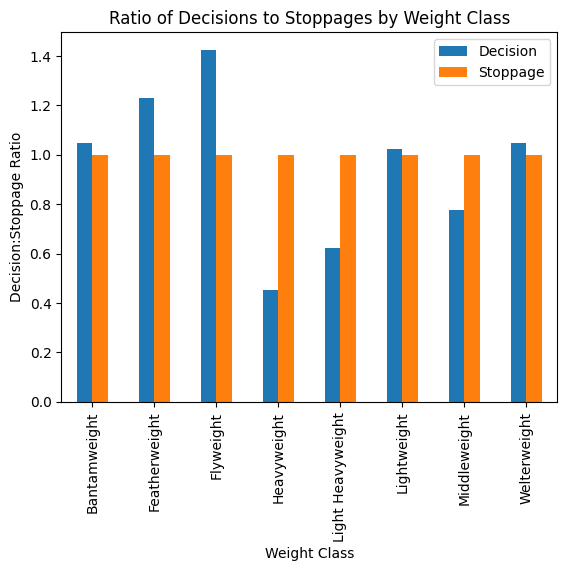

In [99]:
import matplotlib.pyplot as plt

ratios_table.plot(kind='bar')
plt.xlabel('Weight Class')
plt.ylabel('Decision:Stoppage Ratio')
plt.title('Ratio of Decisions to Stoppages by Weight Class')
plt.show()

In [100]:

from scipy.stats import chi2_contingency

chi2, p_val, dof, expected = chi2_contingency(ratios_table)

print('Chi-Square statistic:', chi2)
print('p-value:', p_val)

Chi-Square statistic: 0.415207169819671
p-value: 0.999701564816173


In [101]:
if p_val < 0.05:
	print('We reject the null hypothesis. There is a statistically significant association between weight class and fight outcome.')
else:
	print('We fail to reject the null hypothesis. There is no statistically significant association between weight class and fight outcome.')

We fail to reject the null hypothesis. There is no statistically significant association between weight class and fight outcome.


In [102]:
weight_time = useful_data[['weight_class', 'total_fight_time_secs']]

In [103]:
weight_time.groupby([weight_time.weight_class]).mean().total_fight_time_secs

weight_class
Bantamweight             669.442661
Featherweight            686.355556
Flyweight                729.690722
Heavyweight              536.218462
Light Heavyweight        572.656160
Lightweight              651.589128
Middleweight             628.916505
Welterweight             663.244926
Women's Bantamweight     709.302158
Women's Featherweight    616.100000
Women's Flyweight        727.803922
Women's Strawweight      752.391026
Name: total_fight_time_secs, dtype: float64

<Axes: xlabel='weight_class', ylabel='total_fight_time_secs'>

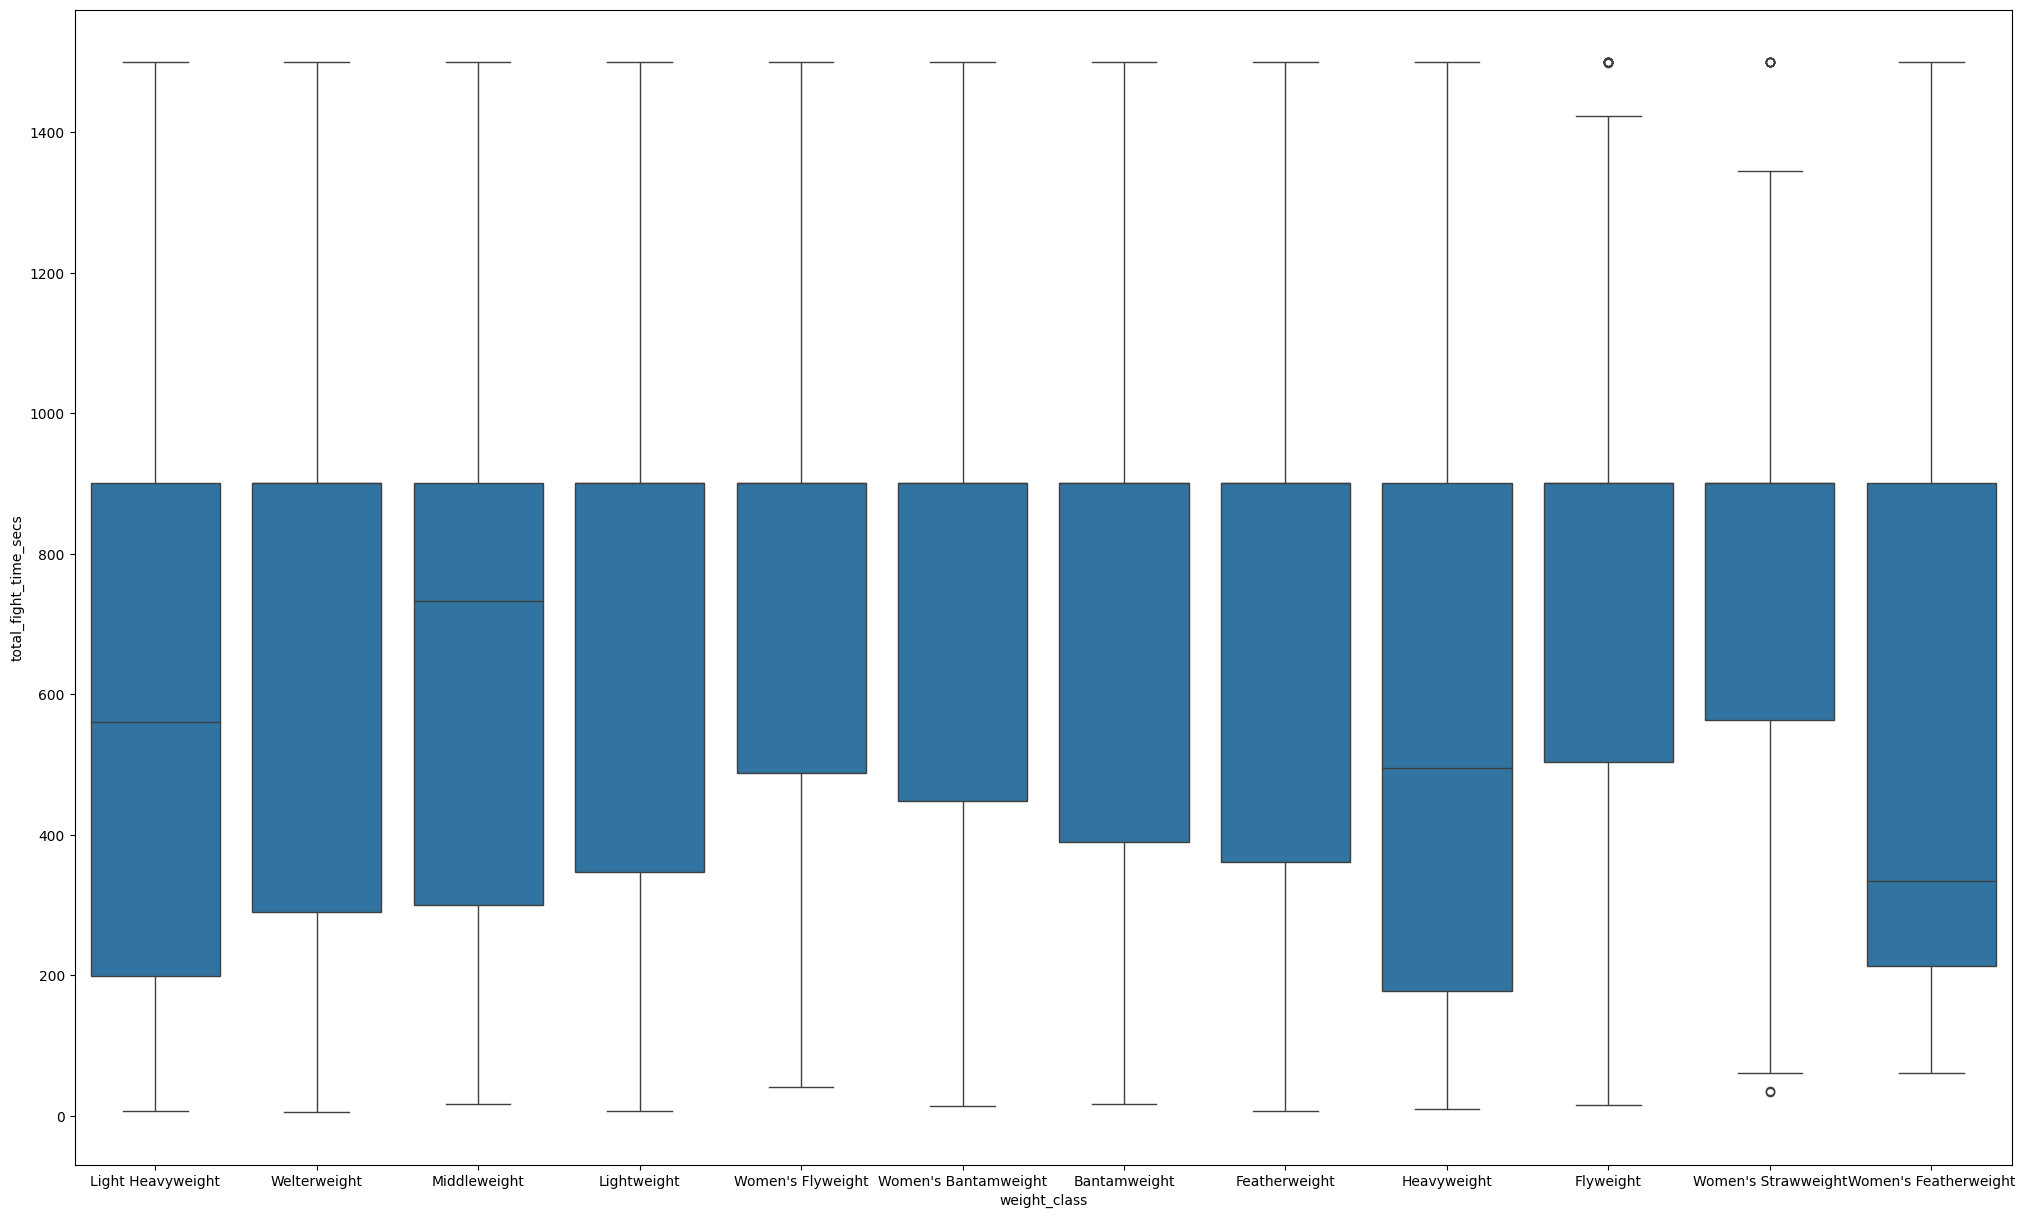

In [104]:
# Set the figure size
plt.figure(figsize=(25,15))  # Adjust the numbers as needed

sns.boxplot(x="weight_class", y="total_fight_time_secs", data=weight_time)

In [105]:
formula = 'total_fight_time_secs ~ C(weight_class)'
model = ols(formula,weight_time).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(weight_class),11.0,1.143684e+07,1.039713e+06,8.272246,1.574172e-14
Residual,4239.0,5.327869e+08,1.256869e+05,NaN,NaN


In [65]:
if aov_table['PR(>F)'][0] < 0.05:
	print('We reject the null hypothesis. There is a statistically significant difference in fight duration across weight classes.')
else:
	print('We fail to reject the null hypothesis. There is no statistically significant difference in fight duration across weight classes.')

We reject the null hypothesis. There is a statistically significant difference in fight duration across weight classes.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13604\2541000264.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if aov_table['PR(>F)'][0] < 0.05:



## 7. Data Quality and Additional Needs

The UFC Fighter Statistics dataset offers valuable insights. However, some data cleaning was necessary to address missing values and inconsistencies. Overall, the dataset provides a good foundation for further exploration.

The original data actually contained a lot more attributes which makes it very good. However, the report can recommend including additional data points for a more comprehensive analysis, such as training camp information:

    •	Total_Training_Hours_per_Week
    •	Sparring_Intensity
    •	Training_Focus
    •	Injuries

By incorporating these elements, we can potentially build more robust models and uncover more nuanced aspects influencing UFC fight outcomes
